In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def readFromCsvTrimHeaders(filename):
    df = pd.read_csv(filename)
    df = df.rename(columns=lambda x: x.strip())
    return df

In [4]:
max_gRate = 0.083 #max growth rate of the 
K = 1000 #carrying capacity for the regular simulations
big_K = 10000 #carring capacity for the big_K simulations
n_mh = 10 #max no. of microhabitats in the runs
#renamed them to reflect their immigration rate values
#list of the corresponding immigration ratios for the below dataframes
r_immig_4c = [0.55, 0.6, 0.7, 0.8]

#dataframes of the times the new microhabitats are added
#each row is a different run
#column n is the time taken to reach microhabitat n
mht_4c_rImm_0_55 = readFromCsvTrimHeaders('stochastic_lagTime/ratios4c_rImmig_0_55-stochastic_microhabs_over_time.csv')
mht_4c_rImm_0_6 = readFromCsvTrimHeaders('stochastic_lagTime/ratios4c_rImmig_0_6-stochastic_microhabs_over_time.csv')
mht_4c_rImm_0_7 = readFromCsvTrimHeaders('stochastic_lagTime/ratios4c_rImmig_0_7-stochastic_microhabs_over_time.csv')
mht_4c_rImm_0_8 = readFromCsvTrimHeaders('stochastic_lagTime/ratios4c_rImmig_0_8-stochastic_microhabs_over_time.csv')

all_mht_4c = [mht_4c_rImm_0_55, mht_4c_rImm_0_6, mht_4c_rImm_0_7, mht_4c_rImm_0_8]
mht_4c_rImm_0_55.head()
mht_4c_rImm_0_55.keys()

Index(['runID', 't_mh_0', 't_mh_1', 't_mh_2', 't_mh_3', 't_mh_4', 't_mh_5',
       't_mh_6', 't_mh_7', 't_mh_8', 't_mh_9'],
      dtype='object')

In [5]:
def getStochasticity(mht_data):
    '''
    this takes in data for a specific immigration ratio parameter set and returns the "stochasticity"
    of the time taken to reach microhabitat n as a function of n
    the data is in the format of each column is the time taken to reach microhabitat n
    stochasticity = stdev(t)/mean(t)
    '''
    
    n_vals = [] #the index of the microhabitat
    stochasticity_vals = [] #measure of the stochasticity in the time taken to make it to that microhabitat
    
    for i in range(n_mh):

        mht_key = 't_mh_'+str(i) #key used to access the data

        n_vals.append(i)
        stochasticity = mht_data[mht_key].std()/mht_data[mht_key].mean()

        stochasticity_vals.append(stochasticity)
        
    return n_vals, stochasticity_vals
        
    
#getStochasticity(all_mht_4c[0])

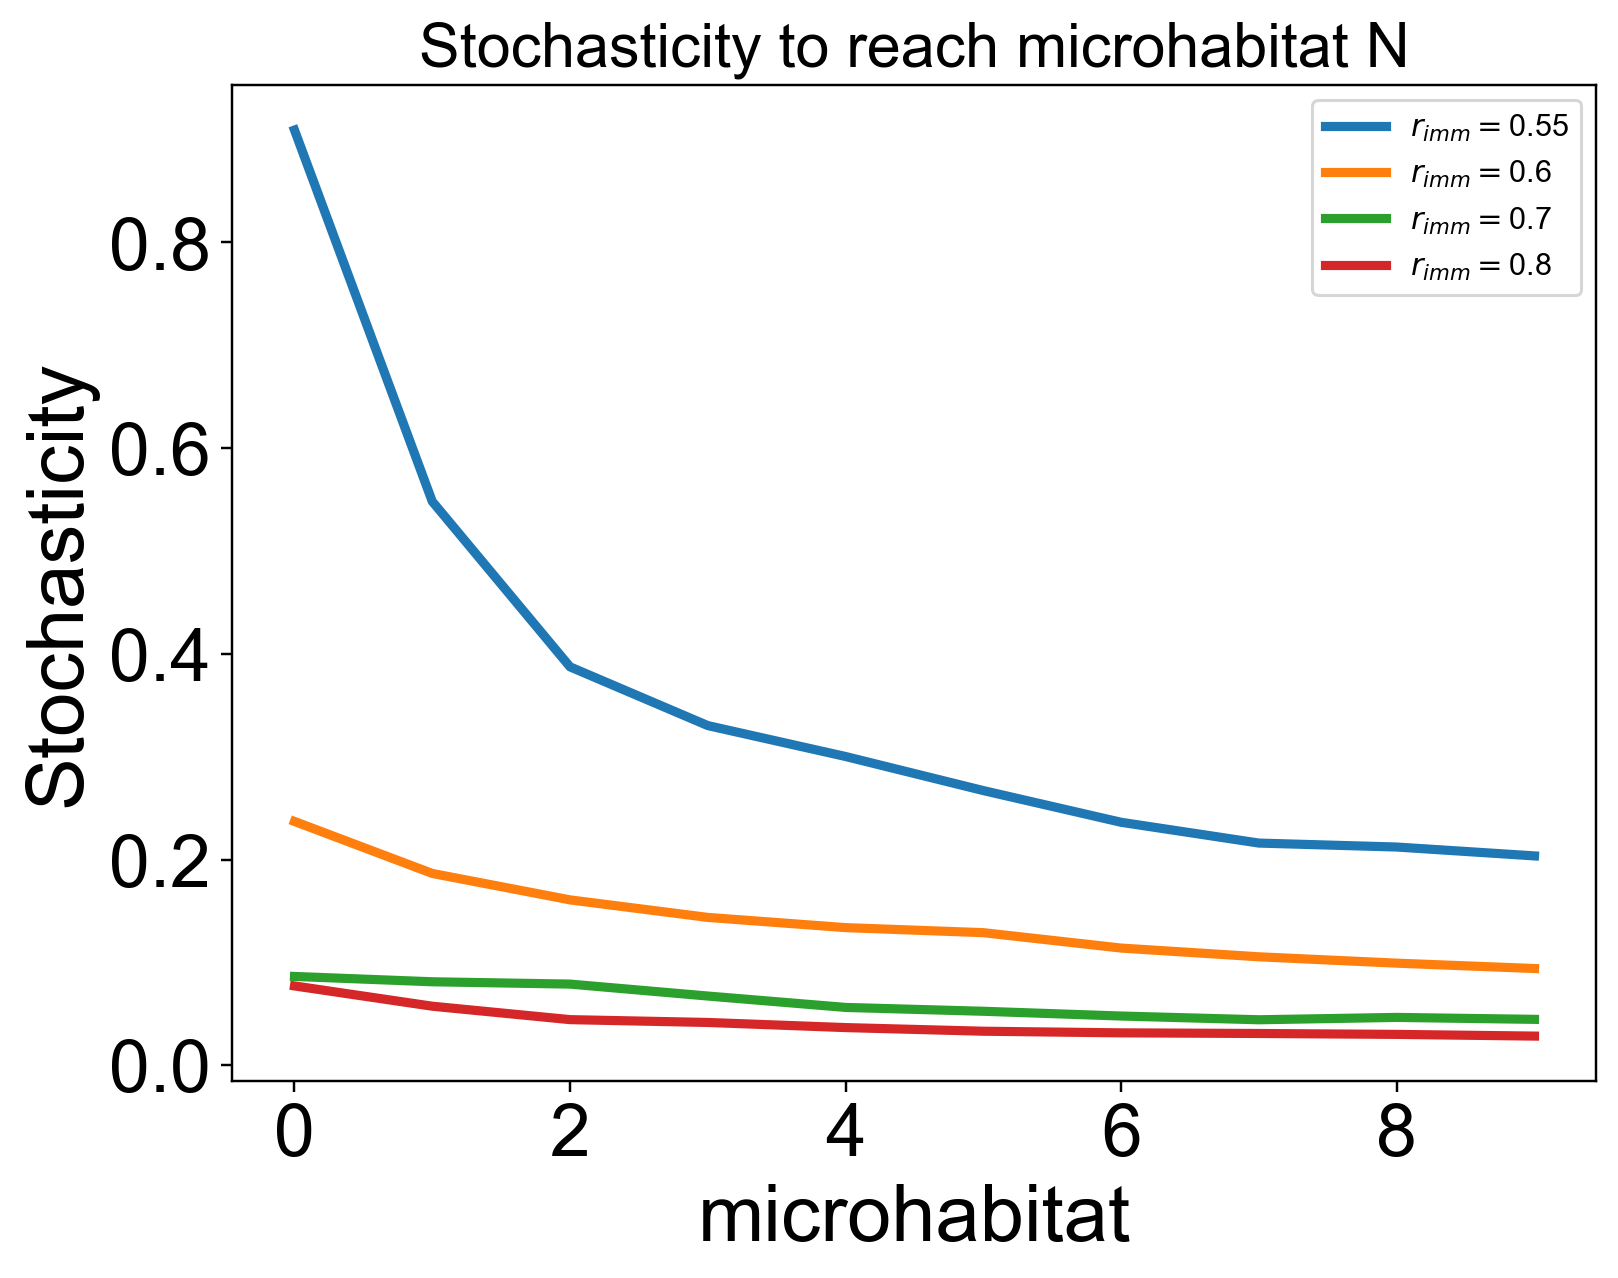

In [20]:
def plotStochasticityVsN(all_mht_data, r_imm_vals):
    
    fig, ax = plt.subplots(figsize=(8,6), dpi=220)
    plt.rcParams['font.sans-serif'] = "Arial"
    
    for data, r_immm in zip(all_mht_data, r_imm_vals):
        nv, sv = getStochasticity(data)
        ax.plot(nv, sv, label='$r_{imm} = $'+str(r_immm), lw=3)
    
    ax.set_title("Stochasticity to reach microhabitat N", fontsize=20)
    ax.set_ylabel("Stochasticity", fontsize=26)
    ax.set_xlabel("microhabitat", fontsize=26)
    ax.tick_params(axis='both', which='major', labelsize=24)
    plt.legend()
    plt.savefig("stochastic_lagTime_plots/stochasticity_vs_N.pdf")
    plt.show()
    
plotStochasticityVsN(all_mht_4c, r_immig_4c)

In [9]:
max_vals = [max(s) for s in all_mht_4c]
max_vals

['t_mh_9', 't_mh_9', 't_mh_9', 't_mh_9']

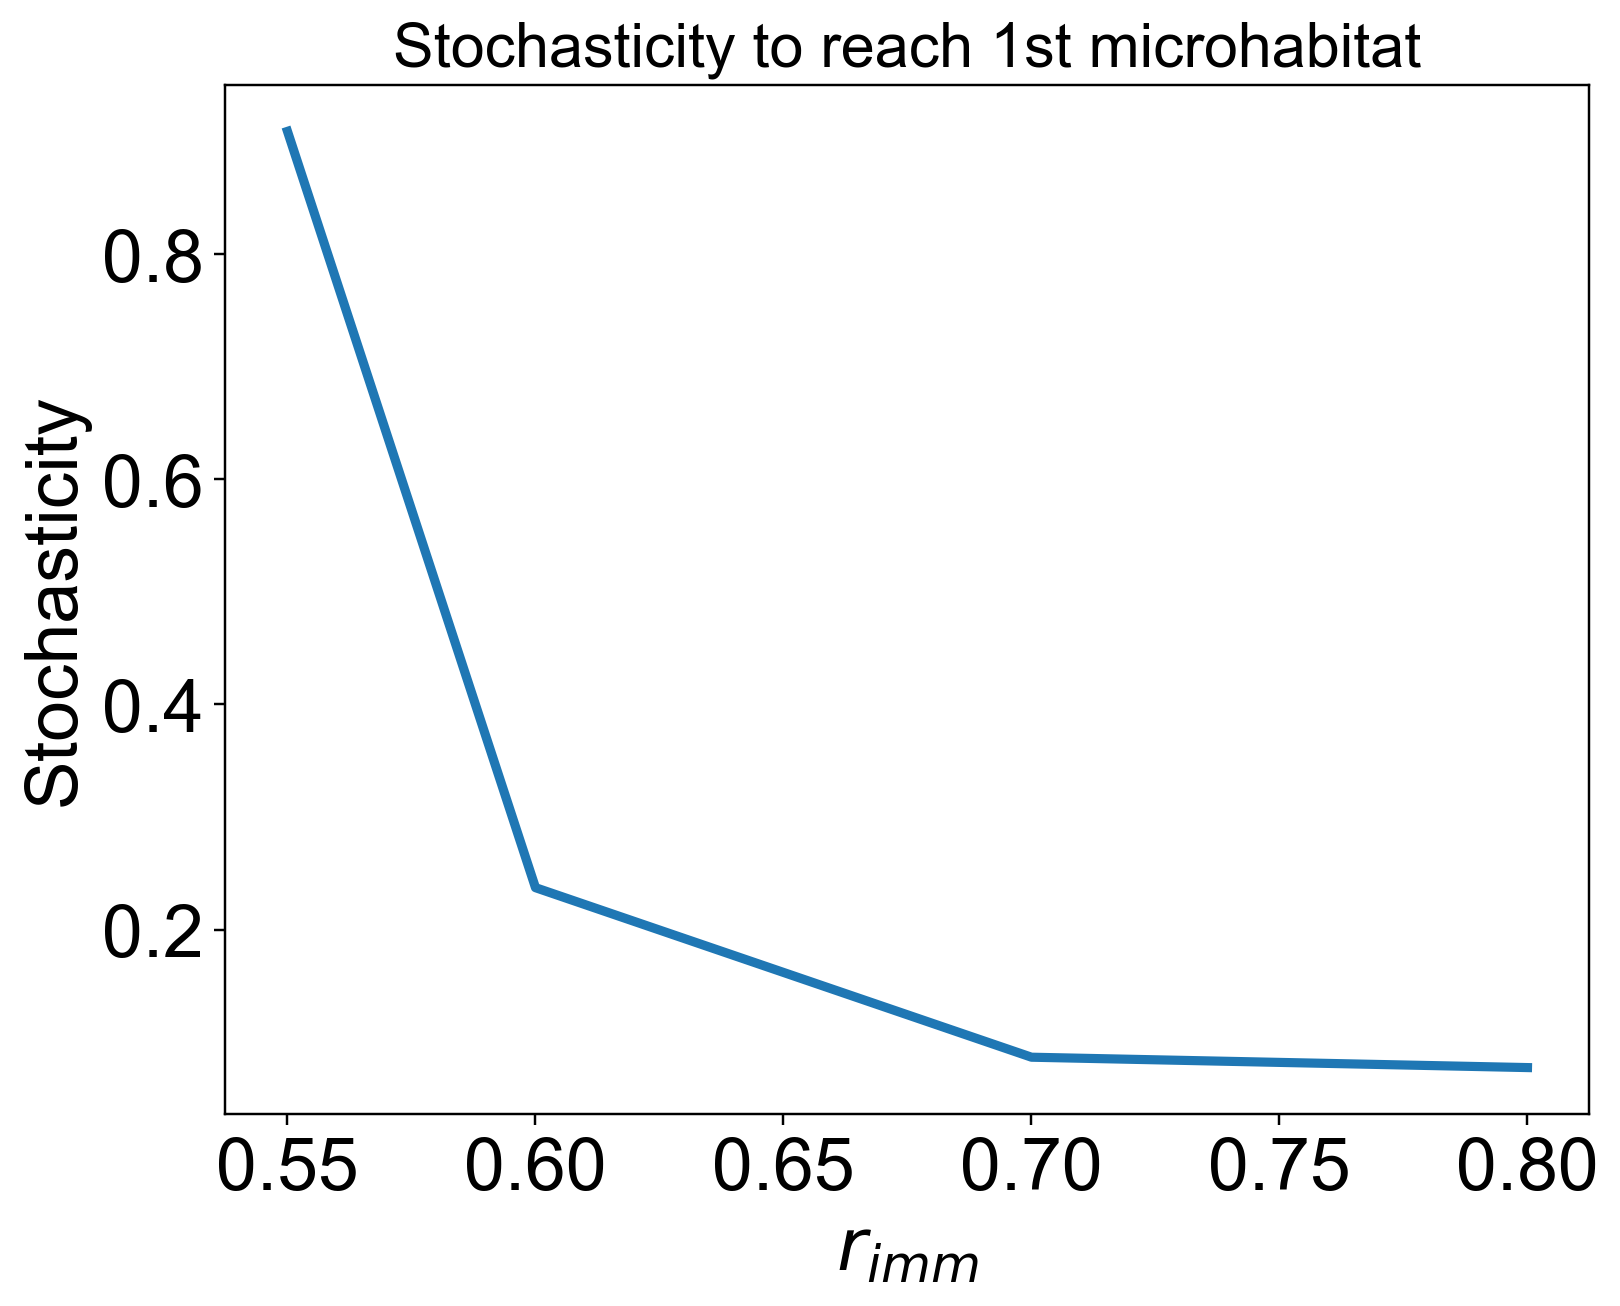

In [19]:
def plotMaxStochasticityVsImmigRate(all_mht_data, r_imm_vals):
    
    fig, ax = plt.subplots(figsize=(8,6.2), dpi=220)
    plt.rcParams['font.sans-serif'] = "Arial"
    
    max_stochastic_vals = [max(getStochasticity(data)[1]) for data in all_mht_data]

    
    ax.plot(r_imm_vals, max_stochastic_vals, lw=3)
    
    ax.set_title("Stochasticity to reach 1st microhabitat", fontsize=20)
    ax.set_ylabel("Stochasticity", fontsize=24)
    ax.set_xlabel("$r_{imm}$", fontsize=24)
    ax.tick_params(axis='both', which='major', labelsize=24)
    #plt.legend()
    plt.savefig("stochastic_lagTime_plots/stochasticity_vs_rImm.pdf")
    plt.show()
    
plotMaxStochasticityVsImmigRate(all_mht_4c, r_immig_4c)